# COGS 108 - Final Project 

# Overview

In this project, I examine the relationship between a food establishment's health inspection score and the average per capita income in that establishment's location, but only in Wake County, North Carolina. My results indicate that there exists no such relationship, and this may be likely due to the numerous amount of facilities that score incredibly high in their health inspections. 

# Name & GitHub

- Name: Noni Arcilla
- GitHub Username: narcilla

# Research Question

In Wake County, NC, what is the relationship between a food facility's health inspection score and the average per capita income in that facility's location?

## Background and Prior Work

Health inspections are very important for restaurants because they give customers an idea of the cleanliness of a restaurant, which should determine whether or not they want to eat at the restaurant. I am going to look at food facilities in Wake County, North Carolina. All facilities over there have to follow the guidelines specified by the North Carolina Food Code Manual and the "Rules Governing the Food Protection and Sanitation of Food Establishments" article [1][2]. Both of those manuals give a plethora of rules and criteria under which North Carolina restaurants need to follow, such as the cleanliness of the restrooms, food preparation conditions, appropriate food temperatures, water requirements, etc [1][2]. In addition to these guides, some specific facilities such as child day care, school lunchrooms, and hotels have additional criteria they need to follow that is tailored towards their type of establishment [4]. In terms of the actual health inspection process, a member(s) of the Wake County Health Department "inspects food service facilities" in that county either once, twice, three times, or four times per year, depending on how much hazardous foods they prepare - one time inspection means they do not prepare any hazardous foods, two means they prepare <= 2 potentially hazardous foods, three times means <= 3 hazardous foods, and four time inspection means they prepare an unlimited number of hazardous foods [3]. 

In terms of the grading criteria that the health inspectors use, they immediately start with the food facility getting 100 points, and then they subtract points based on any violations they observe. The number of points they subtract is determined by the type of violation [2]. For example, violation of the rule regarding "clean and properly washed hands" results in a maximum 4 point deduction [2]. All the details regarding the violation and the associated point value that is subtracted can be found in the "Rules Governing the Food Protection and Sanitation of Food Establishments" article under the "Inspections and Reinspections" section. After the final score is determined, they give it a letter grade: 90 and above is an A, 80-89 is a B, 70-79 is a C, and anything below 70 requires their permit to be revoked [2]. This letter grade is posted on a card and is displayed in a way that is visible to the customers (e.g. in front of the restaurant next to the door) [2]. 

In terms of prior work, there has been effort done by Yelp that informs customers of the details of health inspection scores of restaurants, such as the current grade, the actual score out of 100, health inspection history, and any major or minor violations they have had in the past [5]. By doing this, Yelp hopes that it would have a positive impact on both customers and the restaurants themselves, because the customers would be informed, and the restaurants now have even more determination to ensure their facility is safe and clean, so this could impact their health inspection score. Some other factors that may affect a health inspection score could be the owners' or employees' personal hygiene [6]. Also, some suggested that it might be the manager's behavior and their commitment to their restaurant, as well as how long they have been at the restaurant that could impact their score [6]. I am going to look at per capita income in the restaurant's location, and whether that may have an effect on their health inspection scores.



References (include links):
- 1) https://ehs.ncpublichealth.com/faf/docs/foodprot/NC-FoodCodeManual-2009-FINAL.pdf - North Carolina Food Code Manual
- 2) https://ehs.ncpublichealth.com/docs/rules/294306-26-2600.pdf - "Rules Governing the Food Protection and Sanitation of Food Establishments"
- 3) http://data-wake.opendata.arcgis.com/datasets/food-inspections - talks about the process of health inspections (who does it, how often they do it, etc)
- 4) http://www.wakegov.com/food/healthinspections/facilities/Pages/default.aspx - "Types of Health Inspections", for the different types of facilities (hotels, school lunchrooms, etc)
- 5) https://www.foxnews.com/food-drink/yelp-is-now-publishing-health-inspection-scores-on-restaurant-pages - this is an article about Yelp posting health inspection results for each restaurant
- 6) http://afdoss.afdo.org/wp-content/uploads/2017/02/17-Tara-Paster-Factors-that-Influence-Inspections.pdf - presentation on factors that may influence health inspections

# Hypothesis


I think that a food facility's health inspection score and the average per capita income in that facility's location have a **positive** relationship. This means that if one has a higher inspection score, they are more likely to be in a location with higher per capita income than one with a low inspection score. This is because those who live in high income areas likely have more resources and money to maximize the cleanliness in their business than those who live in lower income areas.

# Dataset(s)

- Dataset Name: inspections
- Link to the dataset: this was one of the provided datasets by Prof. Ellis
- Number of observations: 18466 rows, 36 columns

This gives details about health inspection results in food facilities in Wake County, NC from September 2012 and onward. 

- Dataset Name: zipcodes
- Link to the dataset: this was one of the provided datasets by Prof. Ellis
- Number of observations: 38 rows, 8 columns

This gives socioeconomic information about each zip code in Wake County, NC, such as poverty percentage, average per capita income, median household income, etc.

- Dataset Name: restaurants
- Link to the dataset: this was one of the provided datasets by Prof. Ellis
- Number of observations: 3324 rows, 14 columns

This gives information about each food facility in Wake County, NC, such as name, address, and open date.

**Combining the datasets**: To combine these datasets, I will combine them based on the hsisid, and will also use each restaurant's zip code recorded in the "inspections" dataset to extract the information I need from the "zipcodes" dataset. The resulting dataset is a modified version of the "restaurants" dataset, with columns added and removed. See below (under "Data Cleaning") for a more detailed explanation.

# Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import scipy.stats as stats

In [2]:
# read in the files
df = pd.read_csv('restaurants.csv')
df_inspections = pd.read_csv('inspections.csv')
df_zipcodes = pd.read_csv('zipcodes.csv')

# Data Cleaning

Data cleaning steps:

- First, I dwindle down the "restaurants", "zipcodes", and "inspections" dataset to include only the columns that I need
- Next, I loop through each restaurant in the "restaurants" dataset and do the following:
    - Extract the ID
    - I match that ID with the recorded ID in the "inspections" dataset, and from there I extract only the *latest* health inspection score of the given facility, as well as the zip code and the number of days the facility has been open
    - Next, I use that zip code from the "inspections" dataset to extract information from the "zipcodes" dataset (such as per capita income and poverty percentage)
- All the extracted information from the "inspections" and "zipcodes" datasets are appended as columns to the "restaurants" dataset, and this dataset (df) becomes the dataset I use for analysis

In [3]:
# only include necessary columns
df = df[['hsisid', 'facilitytype']]
df_inspections = df_inspections[['hsisid', 'days_from_open_date', 'facilitytype', 'zip', 'score']]
df_zipcodes = df_zipcodes[['zip', 'per_capita_income_dollars', 'percent_damilies_below_poverty_line']]

In [4]:
# function which is used to combine the multiple datasets into one dataset
def food_match(cur_hsisid):
    # check if each restaurant in df got at least one recorded inspection in df_inspections.
    # if not, then return all -1 values. This will be removed from the dataset later
    cur_df = df_inspections.loc[df_inspections['hsisid'] == cur_hsisid]
    if(len(cur_df) > 0):
        most_recent = cur_df.iloc[len(cur_df)-1, :]
    else:
        return -1, -1, -1, -1, -1
    
    # zipcode = most_recent[3]
    # extract income and poverty percent information from the zipcode.
    # if none exist, then return -1 values for these
    cur_zip = df_zipcodes.loc[df_zipcodes['zip'] == most_recent[3]]
    if len(cur_zip) == 0:
        income = -1
        pov_perc = -1
    else:
        income = int(cur_zip.iloc[0][1])
        pov_perc = cur_zip.iloc[0][2]
    
    # returns num_of_days_open, zip code, health inspection score, avg_income, poverty_percent
    return most_recent[1], most_recent[3], most_recent[4], income, pov_perc

For the next two cells, we use the food_match function to combine all the data into the one dataset, df

In [5]:
# combine all data into separate arrays
longevity, zipcode, score, income, pov_perc = [], [], [], [], []
for i in df.index:
    cur_ID = df.loc[i, 'hsisid']
    food_info = food_match(cur_ID)
    
    longevity.append(food_info[0])
    zipcode.append(food_info[1])
    score.append(food_info[2])
    income.append(food_info[3])
    pov_perc.append(food_info[4])

In [6]:
# add columns in df
df['num_days_open'] = longevity
df['zipcode'] = zipcode
df['insp_score'] = score
df['zip_per_capita_income'] = income
df['zip_pov_perc'] = pov_perc

In [7]:
# get rid of food facilities with no recorded inspections
df = df[df['insp_score'] >= 0]

Next, we manually add the per capita income and poverty percentage information for the cities that did not have that information in the initial dataset (Raleigh and Cary, NC). We also remove data with unknown zip codes or zip codes that are outside Wake County, NC.

In [8]:
# remove zip codes which are unknown or outside Wake County, NC
removed_zip = [27652, 27579, 27595, 27573, 28587, 28145, 27709]
for i in removed_zip:
    df = df[df['zipcode'] != i]

# include income and poverty percent information for Raleigh, NC
ral_zip = [27602, 27695, 27619, 27628, 27624, 27650]
for j in ral_zip:
    df.loc[df['zipcode'] == j, 'zip_per_capita_income'] = 31169
    df.loc[df['zipcode'] == j, 'zip_pov_perc'] = 14.0
    
# include income and poverty percent information for Cary, NC
df.loc[df['zipcode'] == 27512, 'zip_per_capita_income'] = 47656
df.loc[df['zipcode'] == 27512, 'zip_pov_perc'] = 5.6

For privacy, we drop zip code and ID information.

In [9]:
df = df.drop(labels=['hsisid', 'zipcode'], axis=1)

In [10]:
df

,facilitytype,num_days_open,insp_score,zip_per_capita_income,zip_pov_perc
0,Restaurant,110,88.0,24549,11.7
2,Restaurant,3958,98.0,34731,5.5
3,Restaurant,2697,88.5,17363,35.9
4,Institutional Food Service,2779,95.5,21573,11.3
5,Public School Lunchrooms,2758,98.0,19207,19.2
...,...,...,...,...,...
3316,Restaurant,2278,98.5,42632,4.1
3319,Restaurant,783,92.0,25807,9.5
3320,Restaurant,812,97.0,27843,12.6
3322,Restaurant,82,90.0,38830,3.6


# Data Analysis & Results

## EDA

The data (table) is seen below.
As for the **structure** and **granularity**, the data is in a table, with each row representing a food facility and each column being a variable. 

As for the **scope** of the data, the data I have helps me answer the question because I have information about each food facility's inspection score, as well as how long they have been open and the average per capita income and poverty percentage based on each establishment's zip code. 

As for **temporality** information, the dataset does not have any information about when the data were collected. It is also not important for my analysis, except for the information about how long each facility has been in operation.

As for the **faithfulness** of the data, we do not know where the data came from. 

In [11]:
df.head()

,facilitytype,num_days_open,insp_score,zip_per_capita_income,zip_pov_perc
0,Restaurant,110,88.0,24549,11.7
2,Restaurant,3958,98.0,34731,5.5
3,Restaurant,2697,88.5,17363,35.9
4,Institutional Food Service,2779,95.5,21573,11.3
5,Public School Lunchrooms,2758,98.0,19207,19.2


First, we look at the different types of food facilities. An overwhelming majority are restaurants, which is expected.

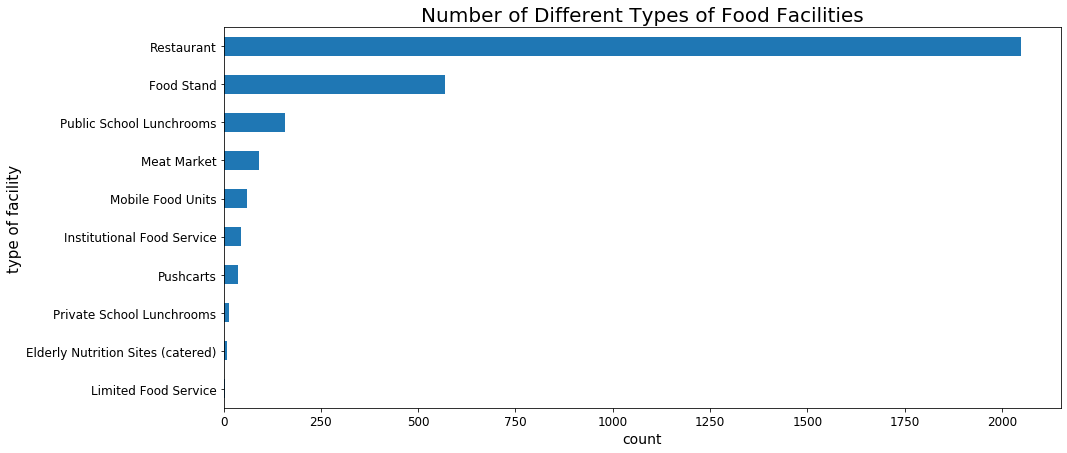

In [12]:
# bar graph of types of food facilities
ax = df['facilitytype'].value_counts().sort_values().plot.barh(figsize=(15, 7))
ax.set_title('Number of Different Types of Food Facilities', fontsize=20)
ax.set_xlabel('count', fontsize=14)
ax.set_ylabel('type of facility', fontsize=15)
ax.tick_params(labelsize=12)

f1 = plt.gcf()

Next, below is a histogram of health inspection scores. We find that a majority of food facilities have gotten a score around a 96, with some possible outliers (see below). It looks like a normal distribution, with the median being around a 96, so an overwhelming majority of food establishments are maintaining cleanliness.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


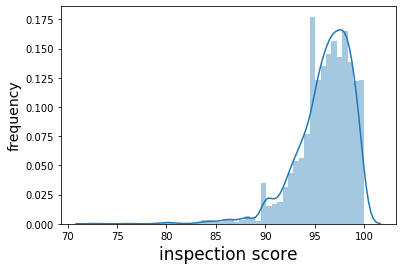

In [13]:
# histogram of inspection scores
plt.subplot(1, 1, 1)
sns.distplot(df['insp_score'])
plt.xlabel("inspection score", fontsize=17)
plt.ylabel("frequency", fontsize=14)

f2 = plt.gcf()

Here is the average health inspection score in Wake County, NC. We can see that numerous food facilities do incredibly well in their health inspections.

In [14]:
df['insp_score'].mean()

96.01448798156075

Here are the outliers (those that scored lower than 80). It turns out they are all restaurants.

In [15]:
df.loc[df['insp_score'] < 80]

,facilitytype,num_days_open,insp_score,zip_per_capita_income,zip_pov_perc
1154,Restaurant,4383,79.0,25385,13.8
2084,Restaurant,102,76.0,38830,3.6
2138,Restaurant,2945,72.5,33139,9.6


Here, we see the per capita income based on location (location meaning zip code). It looks multimodal. This indicates that per capita income throughout Wake County, NC is varied.

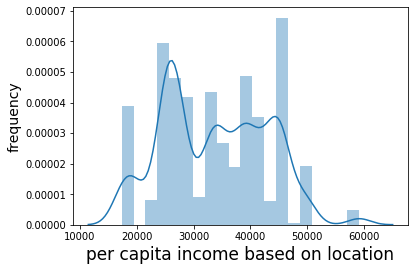

In [16]:
plt.subplot(1, 1, 1)
sns.distplot(df['zip_per_capita_income'])
plt.xlabel("per capita income based on location", fontsize=17)
plt.ylabel("frequency", fontsize=14)

f3 = plt.gcf()

Next, we initially examine the relationship between health inspection score and per capita income.

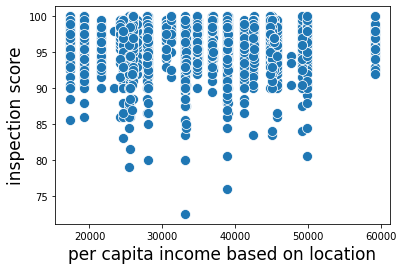

In [17]:
plt.subplot(1, 1, 1)
sns.scatterplot(x='zip_per_capita_income', y='insp_score', data=df, s=100)
plt.xlabel("per capita income based on location", fontsize=17)
plt.ylabel("inspection score", fontsize=17)

f4 = plt.gcf()

From the plot above, it doesn't look like there is much of a relationship between inspection score and per capita income. There seems to be some weak, positive linear relationship by examining the dots in between 25,000 and 50,000 income. Other than that, most facilities seem to consistently score high on their health inspection regardless of their income. Despite that, we'll dig more deeper into statistical tests below.

## Analysis

**Approach**: I try to do linear regression between health inspection score and average per capita income. I used this method because looking at the scatterplot above, it doesn't seem like the variables follow a particular nonlinear relationship (such as quadratic). It looks like there seems to be a weak (linear) increase in inspection score when the per capita income increases, but we only notice this relationship for food facilities with scores below 90. For establishments above 90 (which are the vast majority), it seems like there's no correlation at all.

In [18]:
# relationship between per capita income and inspection score
outcome, predictors = patsy.dmatrices('insp_score ~ zip_per_capita_income', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             insp_score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2702
Date:                Mon, 08 Jun 2020   Prob (F-statistic):              0.603
Time:                        13:20:19   Log-Likelihood:                -7480.7
No. Observations:                3037   AIC:                         1.497e+04
Df Residuals:                    3035   BIC:                         1.498e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                96.11

**Results**: From above, we see that there is no relationship between health inspection score and per capita income since the effect size is 0. In addition, the p-value is incredibly high, so there is no real true relationship between the two factors, so my initial hypothesis is incorrect.

**Interpretation of findings**: I think that one reason why there is no relationship between per capita income and health inspection scores is due to the overwhelming amount of high health inspection scores across the board: approximately 50% of food facilities scored higher than a 95, so there's little variance in the health inspection scores for the most part, so it's hard to determine what factors contribute to a health inspection score in general. Therefore, regardless of income in their area, food facilities consistently score really high in their health inspections, so doing well on health inspections does not necessarily indicate that you have higher income. This could be due to the idea that food facilities will make sure their restaurant is clean when it comes time for a health inspection. 

# Ethics & Privacy

For ethics, I would assume that I have permission to use the datasets because the datasets were provided to us for the individual project. In addition, I looked at where the data was from, which was from the actual Wake County Open Data Portal, and saw that it is publicly available and available for download and for use. In terms of privacy, the original datasets had a lot of specific information about each food establishment, such as the geographical coordinates, address, ID, name of the restaurant, phone number, and their entire postalcode. I removed all of this information from my cleaned dataset in order to maintain their privacy so that all we know about each facility is the type of facility (restaurant, pushcart, etc), health inspection score, number of days they've been open, and the average per capita income and poverty percentage based on their location (but their actual location has been removed). 

In terms of potential biases in the dataset, an overwhelming majority of food facilities in the dataset are restaurants, but that is to be expected. I also saw on the Wake County Open Data website that they update their datasets pretty frequently, so this isn't using data that is very old. However, there may be biases in the inspectors themselves, because some inspectors may be more lenient than others or could have differing opinions as to what is a major or minor violation, so the scores may more heavily depend on the opinions of the inspector. The inspectors could also just be more lenient in general when assigning grades. Also, the dataset only includes information about Wake County, NC, so I cannot generalize my findings to other counties nor the entire U.S.

In terms of the question I posed, I don't think there are any ethical issues with it because I'm just looking at health inspection scores and their relation to per capita income, and the per capita income is based on their zip code because in the dataset we are given the average per capita income for each zip code in Wake County. However, I take out the zip code information in the final cleaned dataset to maintain privacy. 

# Conclusion & Discussion

In this project, I wanted to know what relationship, if any, exists between a food facility's health inspection score and the average per capita income (which is based on their zip code). This was only for locations in Wake County, NC. I used data which came directly from the Wake County website (which was the data provided by Prof. Ellis), and they had very specific information about each restaurant, such as their entire address, the violations they had, their health inspection scores, etc. They also had a dataset where each observation is a zip code, and for each zip code, there's information about the median family/household income, per capita income, poverty percentage, etc. I dwindled this down to one dataset (df) above. For analysis, I used linear regression to first check if there is any real correlation between per capita income and health inspection scores, and it turns out there is none: beta = 0, so I didn't proceed further to check for confounds and just concluded that there is no relationship between the two variables.

Therefore, I found that there exists no relationship between one's health inspection score and the average per capita income in their area. I addressed this above, but again, I think one reason this could be is due to the lack of variability in restaurants' health inspection scores: they just do very well in the process, as the average is 96, and this is reflected across all areas of Wake County, regardless of per capita income. In real life, this makes sense because if facilities want to keep their businesses running, and if they want to make their customers have a very pleasant experience, they would want to have a clean facility, even if they are hurting financially or in an area with high poverty. Also, health inspection scores are not measured based on "which facility is cleaner than the other" (which may be influenced by income), but just on the restaurants' compliance to food safety standards.

There are limitations to this study. First, I found that there is no relationship between health inspection scores and per capita income, so we did not really find a hypothesized relationship in this project. Also, this project is limited to just one factor that may or may not be related to health inspection scores (per capita income). There may be other factors that might be related to how well a restaurant does in their health inspection, such as how long a restaurant has been in operation, the actual setting or location they are in, etc. Also, the conclusions can only be drawn to facilities residing in Wake County, NC.

With these results, people can understand that health inspection ratings are not really based on income. Just because one facility has a low income, that does not mean they are inclined to be less clean and less conforming to health safety standards than one with high income. Everyone strives to maintain food safety in their establishment.